# Business understanding

De hoofdvraag van de opdrachtgever luidt: Hoe kan de Denver PD hun resources beter inzetten tijdens feestdagen?

Om het project wat te scopen hebben we de opdracht gekregen in eerste instantie te kijken naar de volgende feestdagen:

- Memorial day
- Independence day
- Thanksgiving
- Labor day

***
# Data understanding
Dit documentje is een basis voor de data understanding van de datasets die we hebben gekgregen voor de tweede challenge voor de Proof of Concept.


#### NOTE: De code hieronder zorgt dat de rest van het notebook werkt op zowel Mac als Windows

In [2]:
import platform
import os

# Get working directory
working_directory = os.getcwd()

# check if macos
isMac = "macos" in platform.platform().lower()

## Format
De data is aangeleverd in twee losse csv bestanden; crime.csv en offense_codes.csv. De bestanden zijn repectievelijk ±120 mb en ±35kb. 

NOTE: voeg de bestanden toe aan een mapje "data" onder de namen die hierboven staan.

In [3]:
# Variabele 
crime_file_path = (f"{working_directory}/data/crime.csv" if isMac else f"{working_directory}\\data\\crime.csv")
offense_file_path = f"{working_directory}/data/offense_codes.csv" if isMac else f"{working_directory}\\data\\offense_codes.csv"

## Data benaderen
De data kan worden benaderd met de paden die in bovenstaande cell staan. Dit doen we door ze in een Pandas Dataframe te stoppen, zoals hieronder. Hierna kun je in dit hele Jupyter Notebook gebruik maken van de dataframes.

In [4]:
import pandas as pd


# Data in een dataframe te stoppen
crime_df = pd.read_csv(crime_file_path)
offense_df = pd.read_csv(offense_file_path)

In [5]:
# importeren van visualisatie libraries
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from dateutil.relativedelta import relativedelta, MO
import numpy as np

## Data exploratie
Voor beide bestanden willen we eerst een globaal inzicht in de data. Hieronder gaan we ze een voor een bij langs.


### Crime.csv
Allereerst kijken we naar een csv bestand met daarin geregistreerde incidenten die zijn gebeurt in de stad Denver in Amerika.
Hieronder zie je hoeveel records er zijn (470278) en hoeveel kolommen (19). Ook zien we de (door pandas geïnterpreteerde) datatypes.

In [6]:
# Kopie maken van de offense dataset voor later gebruik.
memorialday_offense_df = offense_df.copy()

# Hier maken wij van de datum kolommen pandas readable DateTime kolommen om hier later makkelijker mee te kunnen werken.
crime_df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["FIRST_OCCURRENCE_DATE"])
crime_df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["LAST_OCCURRENCE_DATE"])
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])

# Hier maken wij een nieuwe kolom van de `Reported Date` zonder de tijdsnotatie.
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.year

crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470278 entries, 0 to 470277
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_id               470278 non-null  int64         
 1   offense_id                470278 non-null  int64         
 2   OFFENSE_CODE              470278 non-null  int64         
 3   OFFENSE_CODE_EXTENSION    470278 non-null  int64         
 4   OFFENSE_TYPE_ID           470278 non-null  object        
 5   OFFENSE_CATEGORY_ID       470278 non-null  object        
 6   FIRST_OCCURRENCE_DATE     470278 non-null  datetime64[ns]
 7   LAST_OCCURRENCE_DATE      174528 non-null  datetime64[ns]
 8   REPORTED_DATE             470278 non-null  datetime64[ns]
 9   INCIDENT_ADDRESS          432413 non-null  object        
 10  GEO_X                     466247 non-null  float64       
 11  GEO_Y                     466247 non-null  float64       
 12  GE

De kolommen betekenen het volgende:

| Variabele              | Betekenis                                                                      |
|------------------------|--------------------------------------------------------------------------------|
| incident_id            | De identifier van het indicent                                                 |
| offense_id             | De identifier van de illegale activiteit                                       |
| OFFENSE_CODE           | De code van de illegale activiteit                                             |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de illegale activiteit                              |
| OFFENSE_TYPE_ID        | De type van de illegale activiteit                                             |
| OFFENSE_CATEGORY_ID    | De category van de illegale activiteit                                         |
| FIRST_OCCURRENCE_DATE  | De datum van de eerste voorval van de illegale activiteit                      |
| LAST_OCCURRENCE_DATE   | De datum van de laatste voorval van de illegale activiteit                     |
| REPORTED_DATE          | De datum wanneer het incident is gerapporteerd                                 |
| INCIDENT_ADDRESS       | Het adres waar het incident heeft plaats gevonden                              |
| GEO_X                  | GEO code op de X as van het incident                                           |
| GEO_Y                  | GEO code op de Y as van het incident                                           |
| GEO_LON                | GEO longitude van het incident                                                 |
| GEO_LAT                | GEO latitude van het incident                                                  |
| DISTRICT_ID            | De identifier van de staat/staten waar het indicent zich heeft plaats gevonden |
| PRECINCT_ID            | De identifier van de area waar het indicent zich heeft plaats gevonden         |
| NEIGHBORHOOD_ID        | De identifier van de buurt waar het indicent zich heeft plaats gevonden        |
| IS_CRIME               | Of het incident wel of geen misdaad is                                         |
| IS_TRAFFIC             | Of het incident wel of geen verkeersongeval is                                 |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [7]:
crime_df.describe()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC,YEAR
count,4.702780e+05,4.702780e+05,470278.000000,470278.000000,4.662470e+05,4.662470e+05,4.662460e+05,466246.000000,470277.000000,470277.000000,470278.000000,470278.000000,470278.000000
mean,4.585095e+09,4.585095e+15,3592.342408,0.209038,3.163137e+06,1.695337e+06,-1.049285e+02,39.721679,3.535121,371.170000,0.772800,0.227763,2019.091771
std,1.454714e+10,1.454714e+16,1624.156787,0.578655,6.431941e+05,2.183255e+05,1.793875e+00,0.679421,1.779745,178.910674,0.419023,0.419389,1.502276
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000,0.000000,0.000000,2017.000000
25%,2.017705e+09,2.017705e+15,2305.000000,0.000000,3.139282e+06,1.683173e+06,-1.050048e+02,39.707754,2.000000,221.000000,1.000000,0.000000,2018.000000
50%,2.019399e+09,2.019399e+15,2999.000000,0.000000,3.146122e+06,1.694794e+06,-1.049804e+02,39.739852,3.000000,323.000000,1.000000,0.000000,2019.000000
75%,2.021280e+09,2.021280e+15,5441.000000,0.000000,3.164298e+06,1.702249e+06,-1.049162e+02,39.760192,5.000000,521.000000,1.000000,0.000000,2020.000000
max,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.046707e+08,5.000000e-07,39.904311,7.000000,759.000000,1.000000,1.000000,2022.000000


Hieronder zie je hoe een regel van de dataset eruit ziet.

In [8]:
crime_df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 12:00:00,2022-01-04 20:36:00,128 S CANOSA CT,...,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0,2022-01-04,2022
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaT,2022-01-03 11:01:00,650 15TH ST,...,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0,2022-01-03,2022
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaT,2022-01-03 06:11:00,919 E COLFAX AVE,...,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0,2022-01-03,2022
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaT,2022-01-03 21:12:00,2345 W ALAMEDA AVE,...,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0,2022-01-03,2022
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaT,2022-01-03 20:31:00,7800 E SMITH RD,...,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0,2022-01-03,2022


### Offense_codes.csv
Hieronder zie je een soortgelijk overzicht van de dataset met offense codes. Zoals je ziet zijn er 299 entries met 9 kolommen. Ook zien we de (door pandas geïnterpreteerde) datatypes. 

In [9]:
offense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OBJECTID                299 non-null    int64 
 1   OFFENSE_CODE            299 non-null    int64 
 2   OFFENSE_CODE_EXTENSION  299 non-null    int64 
 3   OFFENSE_TYPE_ID         299 non-null    object
 4   OFFENSE_TYPE_NAME       299 non-null    object
 5   OFFENSE_CATEGORY_ID     299 non-null    object
 6   OFFENSE_CATEGORY_NAME   299 non-null    object
 7   IS_CRIME                299 non-null    int64 
 8   IS_TRAFFIC              299 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.1+ KB


De kolommen betekenen het volgende.

| Variabele              | Beschrijving                                  |
|------------------------|-----------------------------------------------|
| OBJECTID               | De identifier van de misdaad                  |
| OFFENSE_CODE           | De code van de misdaad                        |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de misdaad         |
| OFFENSE_TYPE_ID        | De identifier van de type van de misdaad      |
| OFFENSE_TYPE_NAME      | De naam van de type van de misdaad            |
| OFFENSE_CATEGORY_ID    | De identifier van de categorie van de misdaad |
| OFFENSE_CATEGORY_NAME  | De naam van de categorie van de misdaad       |
| IS_CRIME               | Of de misdaad wel of geen misdaad is          |
| IS_TRAFFIC             | Of de misdaad wel of geen verkeersongeval is  |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [10]:
offense_df.describe()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,IS_CRIME,IS_TRAFFIC
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,150.000000,3368.886288,0.448161,0.979933,0.026756
std,86.458082,1784.546467,0.982987,0.140464,0.161640
min,1.000000,199.000000,0.000000,0.000000,0.000000
25%,75.500000,2100.000000,0.000000,1.000000,0.000000
50%,150.000000,2999.000000,0.000000,1.000000,0.000000
75%,224.500000,5015.500000,0.000000,1.000000,0.000000
max,299.000000,7399.000000,5.000000,1.000000,1.000000


Hieronder zie je hoe een regel van de dataset eruit ziet.

In [11]:
offense_df.head()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


Daarbij hebben we een overzicht van alle unieke offense types

In [12]:
offense_types = offense_df["OFFENSE_TYPE_NAME"]
for type in offense_types:
    print(f"{type}")

Possession of stolen property
Possession of a financial device
Damaged business property
Criminal mischief to private property
Criminal mischief to public property
Criminal mischief - other
Criminal mischief to a motor vehicle
Criminal mischief - graffiti
Manufacture of a hallucinogenic drug
Selling a hallucinogenic drug
Possession of a hallucinogenic drug
Selling heroin
Possession of heroin
Selling opium or an opium derivative
Possession of opium or an opium derivative
Selling cocaine
Possession of cocaine
Selling a synthetic narcotic drug
Possession of a synthetic narcotic drug
Possession of drug paraphernalia
Selling marijuana
Possession of marijuana
Cultivation of marijuana
Manufacture of methampetamine
Selling methampetamine
Possession of methampetamine
Manufacture of a barbiturate
Selling a barbiturate
Possession of a barbiturate
Other dangerous drugs - PCS
Manufacture or sell other dangerous drugs
Fondling of an adult
Indecent exposure
Incest with an adult
Window Peeping
Failure

***
# Algemene data preparation


In [13]:
# Hier maken wij van de datum kolommen pandas readable DateTime kolommen om hier later makkelijker mee te kunnen werken.
crime_df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["FIRST_OCCURRENCE_DATE"])
crime_df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(crime_df["LAST_OCCURRENCE_DATE"])
crime_df["REPORTED_DATE"] = pd.to_datetime(crime_df["REPORTED_DATE"])

# Hier maken wij een nieuwe kolom van de `Reported Date` zonder de tijdsnotatie.
crime_df["REPORTED_DATE_NORMALIZED"] = crime_df["REPORTED_DATE"].dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.year

# Job story 1: Memorial day

## Business understanding
De politiechef van Denver wil een goed overzicht krijgen van de criminaliteit tijdens memorial day in Denver, zodat hij zijn manschappen beter kan verdelen in de stad.

### Determine business objectives
Het eerste wat uitgezocht moet worden is of er tijdens memorial day meer incidenten plaats vinden dan gemiddeld. Als dit het geval is, dan gaan wij verder kijken waar dit vandaan komt.

### Assess situation
Memorial Day is een Amerikaanse feest- en gedenkdag, **gehouden op de laatste maandag in mei**, waarop de overleden Amerikaanse militairen herdacht worden. De gedenkdag begon na de Amerikaanse Burgeroorlog om de doden die voor de Unie stierven tussen 1861 en 1865 te eren.

### Determine data mining goals
Verkrijg alle benodigde data uit de dataset met behulp van de datums van de Memorial Day en dit te vergelijking stellen met het gemiddelde van de gehele dataset.

## Data understanding
Zie globale data understanding

## Data preparation
Als eerste gaan wij de data prepereren. Dit is nodig, omdat alle datums tot nu toe datums zijn met tijdsnotaties. Dit moeten wij eerst omzetten naar reguliere datums.

In [14]:
# Kopie maken van de offense dataset voor later gebruik.
memorialday_offense_df = offense_df.copy()
memorialday_crime_df = crime_df.copy()

### Select data

Omdat Memorial day altijd op de laatste maandag van mei plaats vind, moeten wij dit eerst uitfilteren van de data die we hebben van de afgelopen jaren.

In [15]:
# Maak een pandas DataFrame met daarin alle datum
dates = pd.date_range(memorialday_crime_df["REPORTED_DATE"].min(), datetime.now())

# vars voor leesbaarheid
monday = 0
may = 5

# Krijg alle eerste maandagen van de datums
# dates = dates.shift(1, freq='WOM-4MON')
# dates = dates.unique()

# TODO: Dynamisch inladen van de laatste maandag van de maand.
allMemorialDays = ['2017-05-29', '2018-05-28', '2019-05-27', '2020-05-25', '2021-05-24', '2022-05-30']

# Krijg alle eerste maandagen uit september uit de al bewerkte datums
#mask = (dates.weekday == monday) & (dates.month == may) & np.array(dates.map(lambda v : v.strftime('%Y-%m-%d') in allMemorialDays))
#last_mondays = dates[mask]

# Convert mondays to a DataFrame and to dates only
last_mondays_df = pd.DataFrame()
last_mondays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(allMemorialDays)
last_mondays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(last_mondays_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()
last_mondays_df

,REPORTED_DATE_NORMALIZED
0,2017-05-29
1,2018-05-28
2,2019-05-27
3,2020-05-25
4,2021-05-24
5,2022-05-30


In [16]:
# Verkrijg alle data die verbonden staat aan de laatste maandag van mei.
memorialday_crime_df = pd.merge(memorialday_crime_df, last_mondays_df, on="REPORTED_DATE_NORMALIZED")
memorialday_crime_df = memorialday_crime_df.sort_values("REPORTED_DATE_NORMALIZED")
memorialday_crime_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR
348,2017347915,2017347915131500,1315,0,aggravated-assault,aggravated-assault,2017-05-28 21:00:00,NaT,2017-05-29 04:09:00,3480 PARK AVEW,...,1704085.0,-104.993730,39.765431,1.0,112.0,globeville,1,0,2017-05-29,2017
207,2017348941,2017348941410400,4104,0,liquor-possession,drug-alcohol,2017-05-29 15:50:00,NaT,2017-05-29 16:18:00,21ST ST / ARAPAHOE ST,...,1699391.0,-104.989630,39.752527,6.0,611.0,five-points,1,0,2017-05-29,2017
206,2017349565,2017349565360500,3605,0,indecent-exposure,other-crimes-against-persons,2017-05-29 20:15:00,NaT,2017-05-29 20:15:00,NaN,...,1667296.0,-105.206197,39.665157,4.0,423.0,marston,1,0,2017-05-29,2017
205,2017347780,2017347780357200,3572,0,drug-methampetamine-possess,drug-alcohol,2017-05-29 01:32:00,NaT,2017-05-29 02:48:00,2300 BLOCK W 27TH AVE,...,1700777.0,-105.015178,39.756440,1.0,113.0,highland,1,0,2017-05-29,2017
204,2017347755,2017347755357200,3572,0,drug-methampetamine-possess,drug-alcohol,2017-05-29 00:30:00,NaT,2017-05-29 04:39:00,E 6TH AVE / N MAGNOLIA ST,...,1689621.0,-104.911637,39.725341,3.0,321.0,hilltop,1,0,2017-05-29,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2021292014,2021292014220200,2202,0,burglary-residence-by-force,burglary,2021-05-24 05:04:00,NaT,2021-05-24 05:04:00,1265 N DOWNING ST,...,1693504.0,-104.973327,39.736294,6.0,623.0,capitol-hill,1,0,2021-05-24,2021
551,2021292031,2021292031220200,2202,0,burglary-residence-by-force,burglary,2021-05-23 23:00:00,2021-05-24 04:18:00,2021-05-24 04:18:00,NaN,...,1688232.0,-104.954307,39.721734,3.0,311.0,cherry-creek,1,0,2021-05-24,2021
552,2021293688,2021293688220200,2202,0,burglary-residence-by-force,burglary,2021-05-24 20:40:00,2021-05-24 20:45:00,2021-05-24 22:17:00,NaN,...,1674715.0,-105.007405,39.684860,4.0,422.0,ruby-hill,1,0,2021-05-24,2021
541,2021293545,2021293545131501,1315,1,aggravated-assault-dv,aggravated-assault,2021-05-22 18:00:00,2021-05-23 06:00:00,2021-05-24 19:04:00,4909 S SYRACUSE ST,...,1653825.0,-104.900269,39.627012,3.0,324.0,hampden-south,1,0,2021-05-24,2021


### Dataset description
De nieuwe dataset  memorialday_crime_df bevat nu alle incidenten die hebben gespeeld op de laatste maandag van mei, ofterwijl "Memorial Day".

## Job story 1.1: Is er op Memorial Day meer incidenten dan op een normale dag?
### Business understanding
De politiechef heeft ons gevraagd om te kijken of er meer incidenten voorkomen op Memorial Day dan dat op een normale dag.

### Data preperation
Hierboven aangeduid staat de dataset memorialday_crime_df. Dit gaan we dus gebruiken om te vergelijken. Ook hebben we de algemene dataset crime_df.

### Select data
Om te kunnen modelleren, hebben we een aantal gegevens nodig. Namelijk:

- Gemiddelde aantal incidenten op een normale dag.
- Aantal incidenten op memorial day.

In [17]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j1_memorialday_crime_df = memorialday_crime_df.copy()
j1_memorialday_offense_df = memorialday_offense_df.copy()
j1_crime_df = crime_df.copy()

In [18]:
# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_memorialday_crime_count = j1_memorialday_crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_memorialday_crime_count["YEAR"] = j1_memorialday_crime_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_memorialday_crime_count["TYPE"] = "Memorial Day"

j1_memorialday_crime_count

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-05-29,256,2017,Memorial Day
1,2018-05-28,221,2018,Memorial Day
2,2019-05-27,221,2019,Memorial Day
3,2020-05-25,171,2020,Memorial Day
4,2021-05-24,265,2021,Memorial Day


In [19]:
# Tel alle incidenten op per datum van alle bekende incidenten. Daarna zetten wij de index op de datum.
j1_crime_count = j1_crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_crime_count.index = j1_crime_count["REPORTED_DATE_NORMALIZED"]

j1_crime_count

,REPORTED_DATE_NORMALIZED,size
REPORTED_DATE_NORMALIZED,,
2017-01-02,2017-01-02,147
2017-01-03,2017-01-03,207
2017-01-04,2017-01-04,195
2017-01-05,2017-01-05,187
2017-01-06,2017-01-06,235
...,...,...
2022-02-24,2022-02-24,264
2022-02-25,2022-02-25,251
2022-02-26,2022-02-26,219


In [20]:
# Hier groeperen wij de net opgetelde datum per jaar en bereken wij hier de gemiddelde van. Daarna resetten bij de index naar reguliere identifiers.
j1_crime_mean = j1_crime_count.groupby(pd.Grouper(freq='Y')).mean()
j1_crime_mean = j1_crime_mean.reset_index()

# Hier voegen wij de jaartallen toe en ronden we de aantallen naar hele getallen. Daarna voegen wij nog de type toe.
j1_crime_mean["YEAR"] = j1_crime_mean["REPORTED_DATE_NORMALIZED"].dt.year
j1_crime_mean["size"] = j1_crime_mean["size"].round(0)
j1_crime_mean["TYPE"] = "Gemiddeld"

j1_crime_mean

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-12-31,253.0,2017,Gemiddeld
1,2018-12-31,256.0,2018,Gemiddeld
2,2019-12-31,246.0,2019,Gemiddeld
3,2020-12-31,230.0,2020,Gemiddeld
4,2021-12-31,261.0,2021,Gemiddeld
5,2022-12-31,259.0,2022,Gemiddeld


In [21]:
# Verander de index naar het jaar
j1_crime_mean.set_index("YEAR")
j1_memorialday_crime_count.set_index("YEAR")

# Voeg beide berekende dataframes bij mekaar.
j1_mean_join = pd.concat([j1_crime_mean, j1_memorialday_crime_count])

#Verander de kolom namen
j1_mean_join.columns = ["Datum", "Aantal incidenten", "Jaar", "Meetstaaf"]

j1_mean_join

,Datum,Aantal incidenten,Jaar,Meetstaaf
0,2017-12-31,253.0,2017,Gemiddeld
1,2018-12-31,256.0,2018,Gemiddeld
2,2019-12-31,246.0,2019,Gemiddeld
3,2020-12-31,230.0,2020,Gemiddeld
4,2021-12-31,261.0,2021,Gemiddeld
5,2022-12-31,259.0,2022,Gemiddeld
0,2017-05-29,256.0,2017,Memorial Day
1,2018-05-28,221.0,2018,Memorial Day
2,2019-05-27,221.0,2019,Memorial Day
3,2020-05-25,171.0,2020,Memorial Day


### Modelling
Om de geprepareerde data in kaart te brengen is een barplot gebruikt om de jaren te vergelijken.

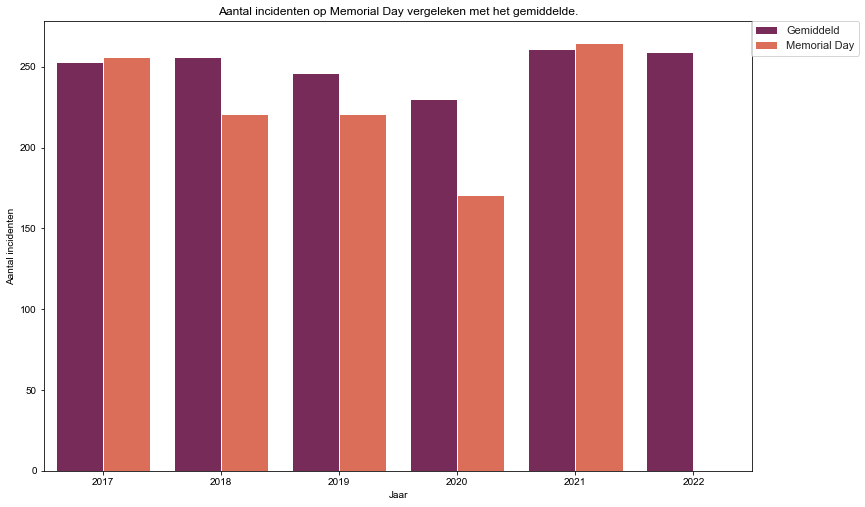

In [22]:
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(ax=ax, data=j1_mean_join, x="Jaar", y="Aantal incidenten", hue="Meetstaaf", palette="rocket").set(title='Aantal incidenten op Memorial Day vergeleken met het gemiddelde.')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', borderaxespad=0)
plt.show()

## Job Story 1.2: Zijn bepaalde misdaden meer gebeurd tijdens Memorial Day dan gemiddeld?
### Business understanding
De politiechef heeft ons gevraagd om te kijken of er bepaalde misdaden meer voorkomen tijdens Memorial Day dan gemiddeld.

### Data preperation
Hierboven aangeduid staat de dataset memorialday_crime_df. Dit gaan we dus gebruiken om te vergelijken. Ook hebben we de algemene dataset crime_df.

### Select data
Om te kunnen modelleren, hebben we een aantal gegevens nodig. Namelijk:

- Aantal incidenten op een normale dag per misdaad.
- Aantal incidenten op memorial day per misdaad.

In [23]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j2 (job story 2) aan het begin van het variabel
j2_memorialday_crime_df = memorialday_crime_df.copy()
j2_memorialday_offense_df = memorialday_offense_df.copy()
j2_crime_df = crime_df.copy()

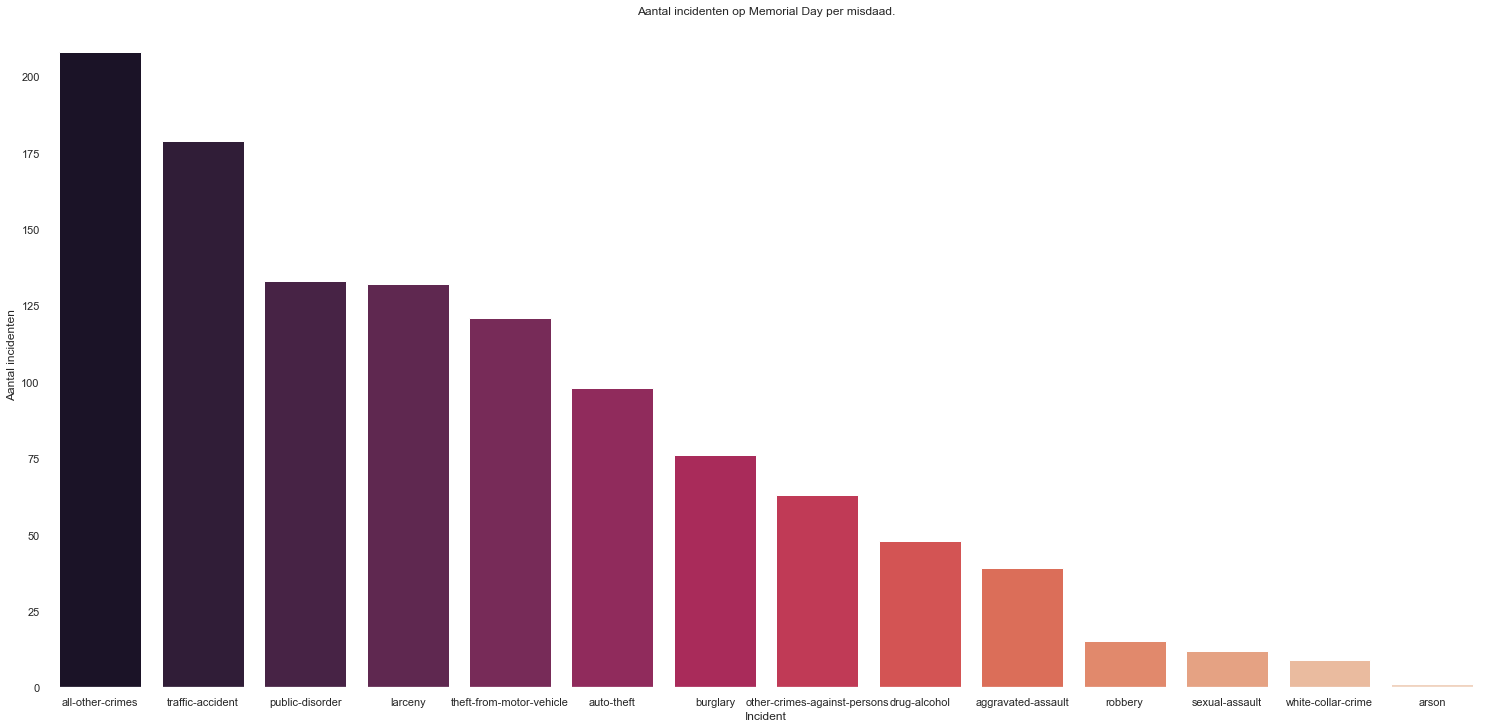

In [24]:
# Hier groepeer ik per misdaad en neem het aantal incidenten hiervan.
j2_offenses_memorialday = j2_memorialday_crime_df.groupby("OFFENSE_CATEGORY_ID").size().to_frame('size').reset_index()
j2_offenses_memorialday.columns = ["Incident", "Aantal incidenten"]
j2_offenses_memorialday["Type"] = "Memorial Day"

a4_dims = (25.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(ax=ax, data=j2_offenses_memorialday, x="Incident", y="Aantal incidenten", palette="rocket", 
order=j2_offenses_memorialday.sort_values('Aantal incidenten',ascending = False).Incident).set(title='Aantal incidenten op Memorial Day per misdaad.')
plt.show()

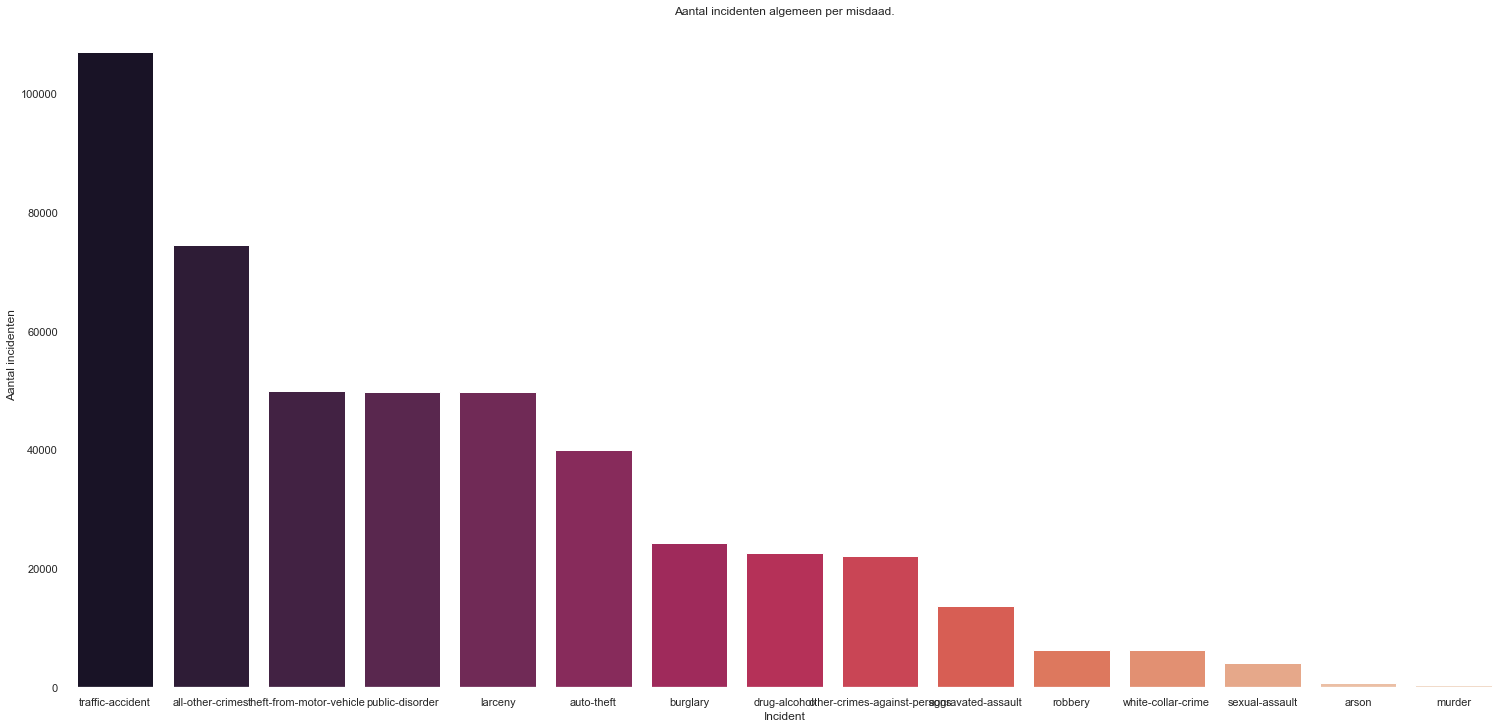

In [25]:
# Hier groepeer ik per misdaad en neem het aantal incidenten hiervan.
j2_offenses_all = j2_crime_df.groupby("OFFENSE_CATEGORY_ID").size().to_frame('size').reset_index()
j2_offenses_all.columns = ["Incident", "Aantal incidenten"]
j2_offenses_all["Type"] = "Gemiddeld"

a4_dims = (25.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(ax=ax, data=j2_offenses_all, x="Incident", y="Aantal incidenten", palette="rocket", 
order=j2_offenses_all.sort_values('Aantal incidenten',ascending = False).Incident).set(title='Aantal incidenten algemeen per misdaad.')
plt.show()

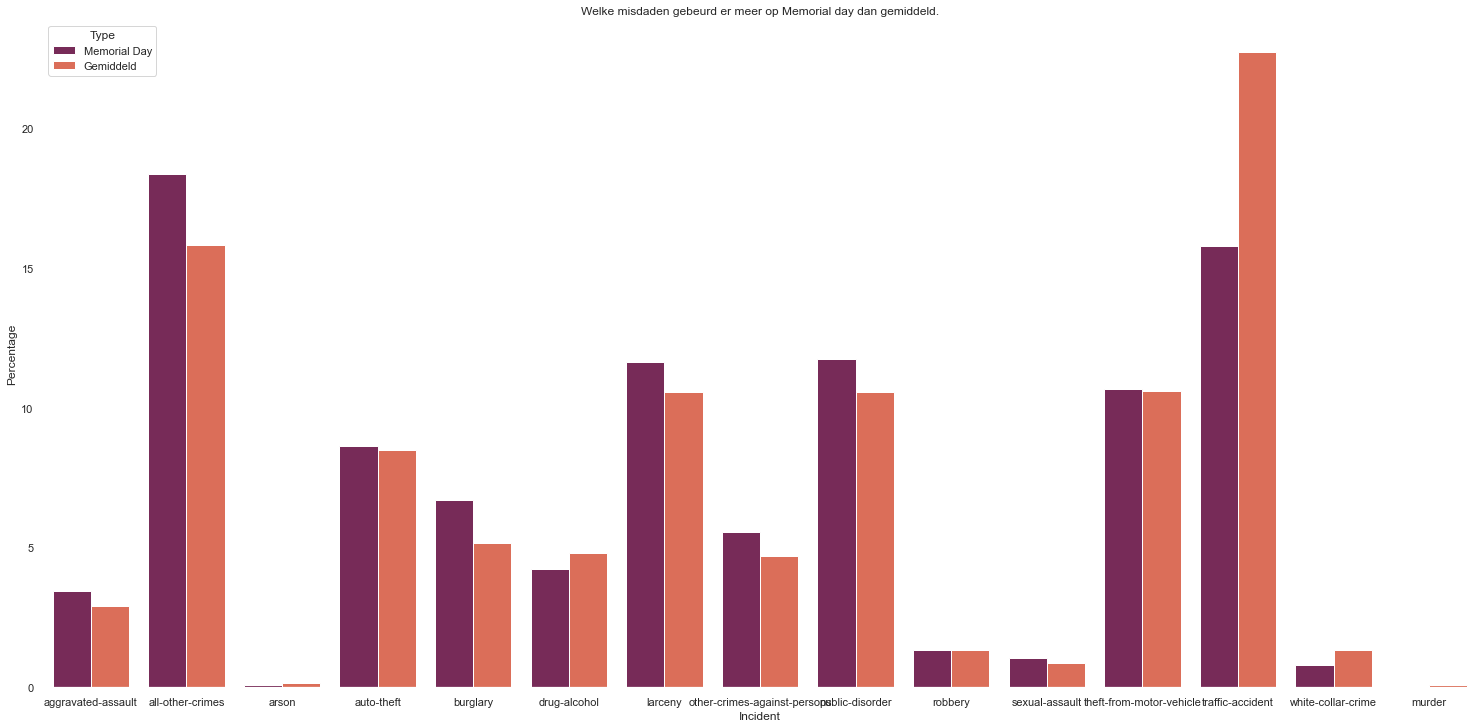

In [26]:
# Hier doe ik een magische formule om te kunnen vergelijken tussen kleine datasets en grote datasets
j2_offenses_memorialday["Percentage"] = j2_offenses_memorialday["Aantal incidenten"] / j2_offenses_memorialday["Aantal incidenten"].sum() * 100
j2_offenses_all["Percentage"] = j2_offenses_all["Aantal incidenten"] / j2_offenses_all["Aantal incidenten"].sum() * 100

# Voeg ze samen :D
j2_offenses_merged = pd.concat([j2_offenses_memorialday, j2_offenses_all])

a4_dims = (25.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(ax=ax, data=j2_offenses_merged, x="Incident", y="Percentage", palette="rocket", hue="Type").set(title='Welke misdaden gebeurd er meer op Memorial day dan gemiddeld.')
plt.show()

## Job Story 1.3: In welke buurten is de misdaad tijdens Memorial day hoger dan gemiddeld?
### Business understanding
De politiechef heeft ons gevraagd om te kijken of er bepaalde buurten meer incidenten voorkomen tijdens Memorial Day dan gemiddeld.

### Data preperation
Hierboven aangeduid staat de dataset memorialday_crime_df. Dit gaan we dus gebruiken om te vergelijken. Ook hebben we de algemene dataset crime_df.

### Select data
Om te kunnen modelleren, hebben we een aantal gegevens nodig. Namelijk:

- Aantal incidenten op een normale dag per buurt.
- Aantal incidenten op memorial day per buurt.

In [27]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j2 (job story 2) aan het begin van het variabel
j3_memorialday_crime_df = memorialday_crime_df.copy()
j3_memorialday_offense_df = memorialday_offense_df.copy()
j3_crime_df = crime_df.copy()

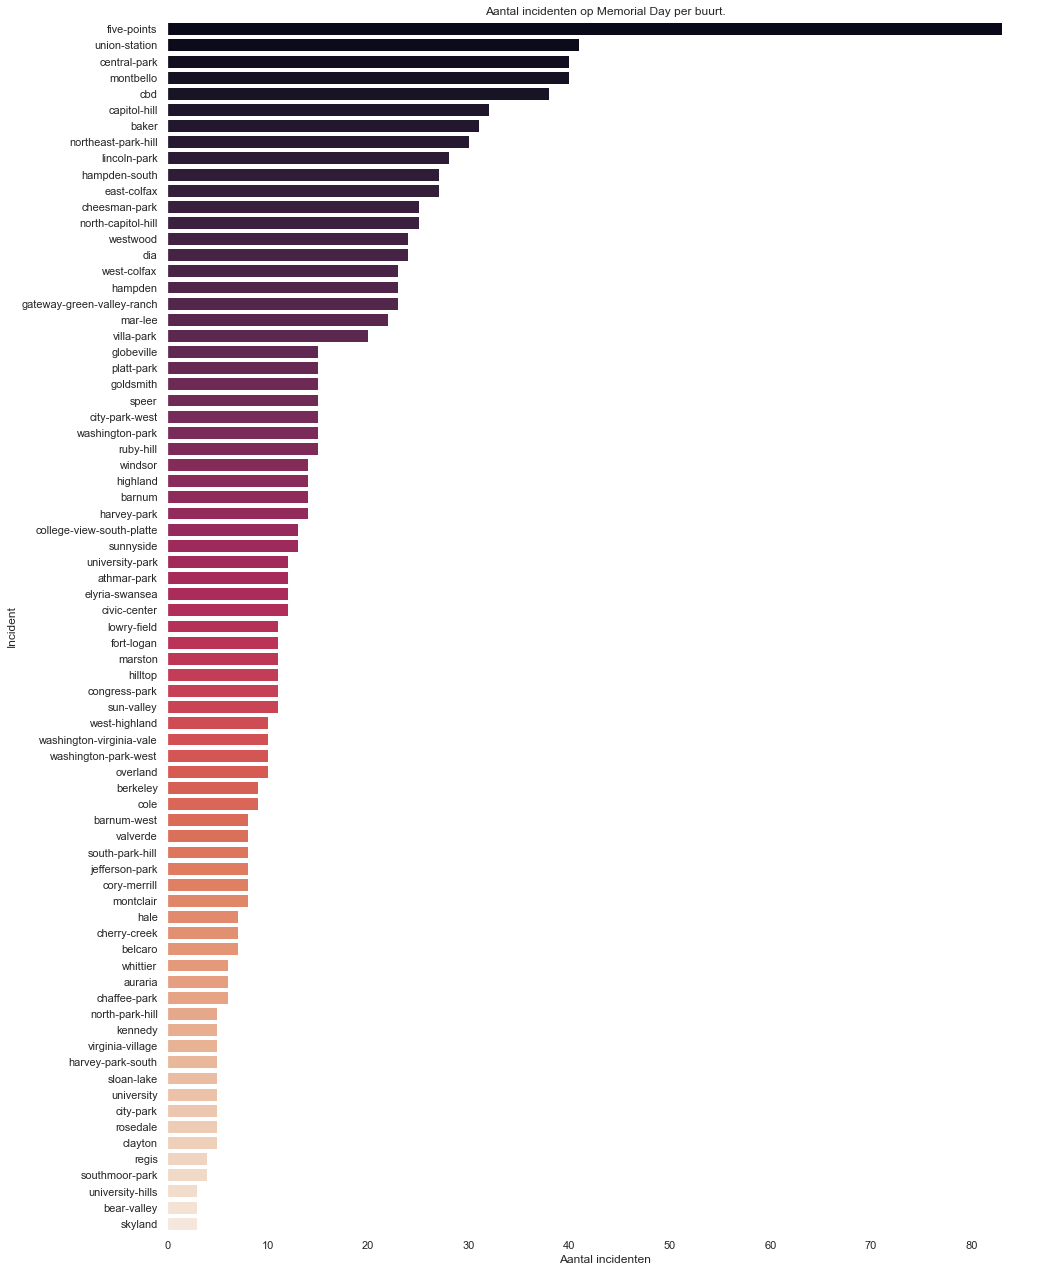

In [28]:
# Hier groepeer ik per misdaad en neem het aantal incidenten hiervan.
j3_offenses_memorialday = j3_memorialday_crime_df.groupby("NEIGHBORHOOD_ID").size().to_frame('size').reset_index()
j3_offenses_memorialday.columns = ["Incident", "Aantal incidenten"]
j3_offenses_memorialday["Type"] = "Memorial Day"

a4_dims = (15.7, 22.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(
    ax=ax, 
    data=j3_offenses_memorialday, 
    x="Aantal incidenten", 
    y="Incident", 
    palette="rocket", 
    order=j3_offenses_memorialday.sort_values('Aantal incidenten',ascending = False).Incident).set(title='Aantal incidenten op Memorial Day per buurt.')
    
plt.show()

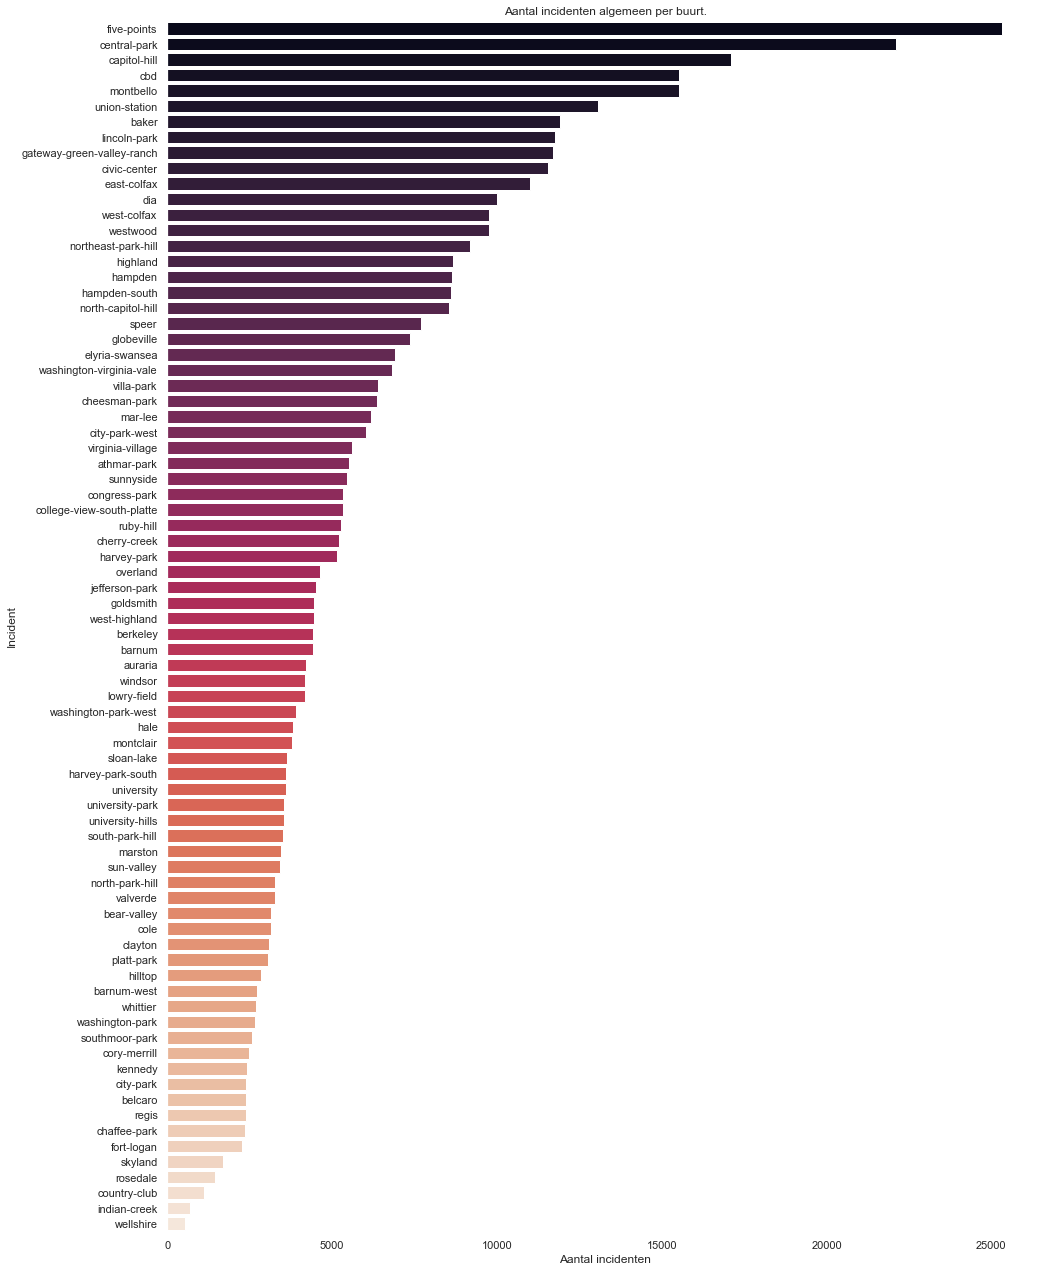

In [29]:
# Hier groepeer ik per misdaad en neem het aantal incidenten hiervan.
j3_offenses_all = j3_crime_df.groupby("NEIGHBORHOOD_ID").size().to_frame('size').reset_index()
j3_offenses_all.columns = ["Incident", "Aantal incidenten"]
j3_offenses_all["Type"] = "Gemiddeld"

a4_dims = (15.7, 22.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(
    ax=ax, 
    data=j3_offenses_all, 
    x="Aantal incidenten", 
    y="Incident", 
    palette="rocket", 
    order=j3_offenses_all.sort_values('Aantal incidenten',ascending = False).Incident).set(title='Aantal incidenten algemeen per buurt.')
    
plt.show()

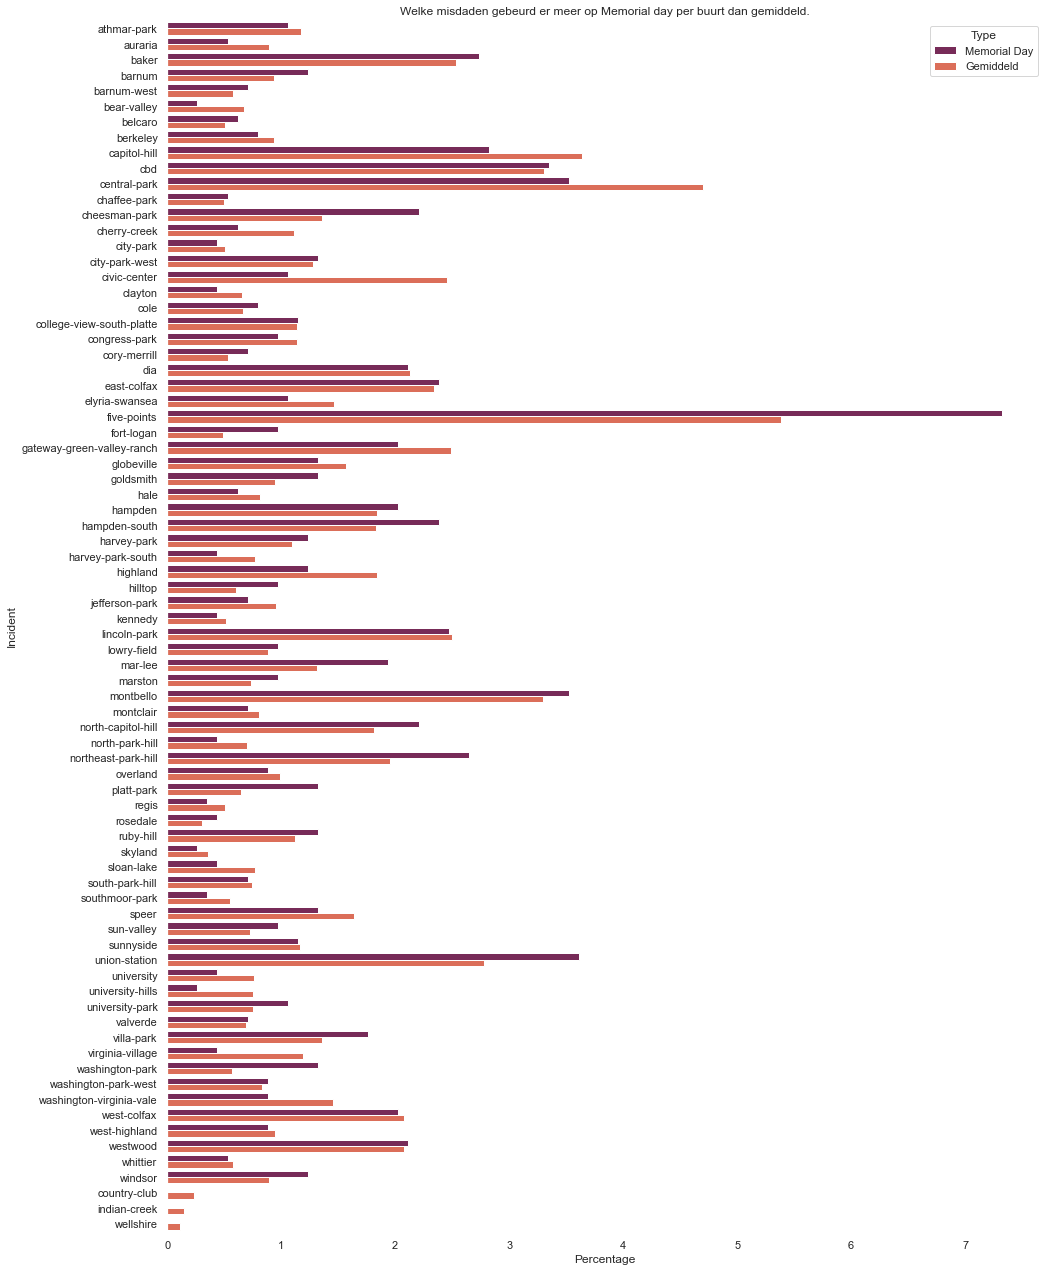

In [30]:
# Hier doe ik een magische formule om te kunnen vergelijken tussen kleine datasets en grote datasets
j3_offenses_memorialday["Percentage"] = j3_offenses_memorialday["Aantal incidenten"] / j3_offenses_memorialday["Aantal incidenten"].sum() * 100
j3_offenses_all["Percentage"] = j3_offenses_all["Aantal incidenten"] / j3_offenses_all["Aantal incidenten"].sum() * 100

# Voeg ze samen :D
j3_offenses_merged = pd.concat([j3_offenses_memorialday, j3_offenses_all])
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
a4_dims = (15.7, 22.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(ax=ax, data=j3_offenses_merged, x="Percentage", y="Incident", palette="rocket", hue="Type").set(title='Welke misdaden gebeurd er meer op Memorial day per buurt dan gemiddeld.')
plt.show()

***
# Job story 2: Labour day

## Algemene business understanding
De poltiechef van Denver wil inzicht krijgen in criminaliteit op labour day in Denver, zodat hij af kan wegen of hij zijn troepen anders in kan/moet zetten.

## Determine business objectives
Breng in kaart of er op labour day verschil is met een gemiddelde dag. Zo ja, breng vervolgens in kaart wat er verschillend is.

## Assess situation
Labour day is een feestadg om de werkers van Amerika te eren. Labour day vindt plaats op de eerste maandag van september.

## Determine data mining goals
Krijg uit de Denver criminaliteit dataset alle labourday data en vergelijk deze met de gemiddelde data.



***
## Data understanding voor labour day
Zie algemene data understanding

***
## Algemene data preparation

In [31]:
# DataFrame met alle labourday data
labourday_offense_df = offense_df.copy()


crime_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(crime_df["REPORTED_DATE"]).dt.normalize()
crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.year

labourday_crime_df = crime_df.copy()


# Van datum kolommen het DateTime format van maken om bepaalde datums te kunnen selecteren
labourday_crime_df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(labourday_crime_df["FIRST_OCCURRENCE_DATE"])
labourday_crime_df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(labourday_crime_df["LAST_OCCURRENCE_DATE"])
labourday_crime_df["REPORTED_DATE"] = pd.to_datetime(labourday_crime_df["REPORTED_DATE"])

De data gaat terug tot Januari 2017. We kunnen dus 5 jaren analyseren. Zie onderstaand:

In [32]:
start_date = labourday_crime_df["REPORTED_DATE"].min()
start_date

Timestamp('2017-01-02 00:19:00')

### Select data
Om de labourday data op te halen maken we eerst een lijst met de labourday datums van de afgelopen 5 jaar. Daarmee maken we een intercept, oftewel we halen uit de crime set alle crimes op met deze datums als REPORTED_DATE

In [33]:
# Maak een pandas DataFrame met daarin alle datum
dates = pd.date_range(start_date, datetime.now())
dates

DatetimeIndex(['2017-01-02 00:19:00', '2017-01-03 00:19:00',
               '2017-01-04 00:19:00', '2017-01-05 00:19:00',
               '2017-01-06 00:19:00', '2017-01-07 00:19:00',
               '2017-01-08 00:19:00', '2017-01-09 00:19:00',
               '2017-01-10 00:19:00', '2017-01-11 00:19:00',
               ...
               '2022-03-12 00:19:00', '2022-03-13 00:19:00',
               '2022-03-14 00:19:00', '2022-03-15 00:19:00',
               '2022-03-16 00:19:00', '2022-03-17 00:19:00',
               '2022-03-18 00:19:00', '2022-03-19 00:19:00',
               '2022-03-20 00:19:00', '2022-03-21 00:19:00'],
              dtype='datetime64[ns]', length=1905, freq='D')

In [34]:
# vars voor leesbaarheid
monday = 0
september = 9

# Krijg alle eerste maandagen van de datums
dates = dates.shift(1, freq='WOM-1MON')
dates = dates.unique()

# Krijg alle eerste maandagen uit september uit de al bewerkte datums
mask = (dates.weekday == monday) & (dates.month == september)
first_mondays = dates[mask]

# Convert mondays to a DataFrame and to dates only
first_mondays_df = pd.DataFrame()
first_mondays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(first_mondays)
first_mondays_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(first_mondays_df["REPORTED_DATE_NORMALIZED"]).dt.normalize()
first_mondays_df

/Users/sebastiaankolmschate/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


,REPORTED_DATE_NORMALIZED
0,2017-09-04
1,2018-09-03
2,2019-09-02
3,2020-09-07
4,2021-09-06


In [35]:
# Labour day merge
labourday_crime_df = pd.merge(labourday_crime_df, first_mondays_df, on="REPORTED_DATE_NORMALIZED")
labourday_crime_df = labourday_crime_df.sort_values("REPORTED_DATE_NORMALIZED")
labourday_crime_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR
481,2017592783,2017592783269903,2699,3,theft-of-services,larceny,2017-09-04 09:45:00,NaT,2017-09-04 10:29:00,360 S DAHLIA ST,...,1684194.0,-104.931485,39.710540,3.0,322.0,washington-virginia-vale,1,0,2017-09-04,2017
311,2017593168,2017593168540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2017-09-04 13:03:00,NaT,2017-09-04 13:55:00,W 8TH AVE / N KALAMATH ST,...,1690777.0,-105.000176,39.728924,1.0,123.0,lincoln-park,0,1,2017-09-04,2017
310,2017593271,2017593271540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2017-09-02 23:30:00,NaT,2017-09-04 14:00:00,1221 N CHEROKEE ST,...,1693251.0,-104.991744,39.735680,6.0,611.0,civic-center,0,1,2017-09-04,2017
309,2017594161,2017594161540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2017-09-04 13:34:00,NaT,2017-09-04 21:55:00,1500 BLOCK N LOGAN ST,...,1695149.0,-104.982244,39.740849,6.0,621.0,north-capitol-hill,0,1,2017-09-04,2017
308,2017592720,2017592720539900,5399,0,public-peace-other,public-disorder,2017-09-04 08:30:00,NaT,2017-09-04 08:56:00,500 BLOCK 16TH ST,...,1696397.0,-104.991308,39.744315,6.0,611.0,cbd,1,0,2017-09-04,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021513775,2021513775230300,2303,0,theft-shoplift,larceny,2021-09-06 11:00:00,2021-09-06 11:30:00,2021-09-06 12:22:00,500 S SANTA FE DR,...,1682796.0,-104.994070,39.706988,3.0,312.0,baker,1,0,2021-09-06,2021
629,2021513998,2021513998230300,2303,0,theft-shoplift,larceny,2021-09-06 12:32:00,NaT,2021-09-06 13:39:00,7757 E 36TH AVE,...,1705282.0,-104.897670,39.768265,5.0,512.0,central-park,1,0,2021-09-06,2021
628,2021514557,2021514557230300,2303,0,theft-shoplift,larceny,2021-09-06 19:00:00,2021-09-06 19:28:00,2021-09-06 19:28:00,1416 PLATTE ST,...,1700399.0,-105.009555,39.755379,1.0,113.0,highland,1,0,2021-09-06,2021
640,2021514060,2021514060230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2021-08-04 12:00:00,NaT,2021-09-06 14:13:00,2330 S KEARNEY ST,...,1670986.0,-104.917317,39.674211,3.0,323.0,goldsmith,1,0,2021-09-06,2021


## Job story 2.1: Vergelijking per jaar of op een labour day dag meer criminaliteit is dan een gemiddelde dag

### Business understanding
In deze job story verkennen we of er op labour days verschil is in het aantal misdaad ten opzichte van een gemiddelde dag per jaar.

### Data preperation
We maken gebruik van de in de algemene data preparartion voorbereide labourday_crime_df pandas.DataFrame

### Select data
Wat hebben we nodig om deze gemiddeldes te kunnen vergelijken?

- De gemiddelde aantal misdaad op een normale dag.
- De gemiddelde aantal misdaad op labour day.

In [36]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j1_labourday_crime_df = labourday_crime_df.copy()
j1_labourday_offense_df = labourday_offense_df.copy()

In [37]:
j1_labour_crime_count = labourday_crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_labour_crime_count["YEAR"] = j1_labour_crime_count["REPORTED_DATE_NORMALIZED"].dt.year
j1_labour_crime_count["TYPE"] = "Labour day"
j1_labour_crime_count

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-09-04,230,2017,Labour day
1,2018-09-03,228,2018,Labour day
2,2019-09-02,252,2019,Labour day
3,2020-09-07,213,2020,Labour day
4,2021-09-06,231,2021,Labour day


In [38]:
j1_crime_count = crime_df.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_crime_count.index = j1_crime_count["REPORTED_DATE_NORMALIZED"]
j1_crime_count

j1_crime_mean = j1_crime_count.groupby(pd.Grouper(freq='Y')).mean()
j1_crime_mean = j1_crime_mean.reset_index()
j1_crime_mean["YEAR"] = j1_crime_mean["REPORTED_DATE_NORMALIZED"].dt.year

j1_crime_mean["size"] = j1_crime_mean["size"].round(0)
j1_crime_mean["TYPE"] = "Gemiddeld"
j1_crime_mean

,REPORTED_DATE_NORMALIZED,size,YEAR,TYPE
0,2017-12-31,253.0,2017,Gemiddeld
1,2018-12-31,256.0,2018,Gemiddeld
2,2019-12-31,246.0,2019,Gemiddeld
3,2020-12-31,230.0,2020,Gemiddeld
4,2021-12-31,261.0,2021,Gemiddeld
5,2022-12-31,259.0,2022,Gemiddeld


In [39]:
j1_crime_mean.set_index("YEAR")
j1_labour_crime_count.set_index("YEAR")

j1_mean_join = j1_crime_mean.append(j1_labour_crime_count)

j1_mean_join.columns = ["Datum", "Aantal meldingen", "Jaar", "Type"]

j1_mean_join

,Datum,Aantal meldingen,Jaar,Type
0,2017-12-31,253.0,2017,Gemiddeld
1,2018-12-31,256.0,2018,Gemiddeld
2,2019-12-31,246.0,2019,Gemiddeld
3,2020-12-31,230.0,2020,Gemiddeld
4,2021-12-31,261.0,2021,Gemiddeld
5,2022-12-31,259.0,2022,Gemiddeld
0,2017-09-04,230.0,2017,Labour day
1,2018-09-03,228.0,2018,Labour day
2,2019-09-02,252.0,2019,Labour day
3,2020-09-07,213.0,2020,Labour day


### Modelling
Om de geprepareerde data in kaart te brengen is een barplot gebruikt om de jaren te vergelijken.

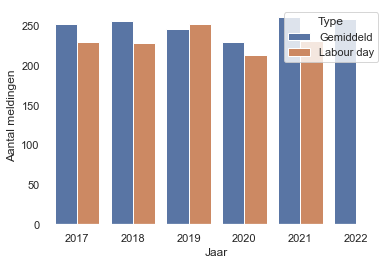

In [40]:
sns.barplot(data=j1_mean_join, x="Jaar", y="Aantal meldingen", hue="Type")
plt.show()

## Job story 2.2: Vergelijking van gemiddelde meldingen en meldingen op labour day per jaar

## Business understanding
In deze job story verkennen we of er op labour days verschil is in type misdaad ten opzichte van een gemiddelde dag per jaar.

## Data preparation
We maken gebruik van de in de algemene data preparartion voorbereide labourday_crime_df pandas.DataFrame

## Select data
Wat hebben we nodig om deze gemiddeldes te kunnen vergelijken? De gemiddelde type misdaad op een normale dag per jaar. De gemiddelde type misdaad op labour day per jaar.

In [41]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j2_labourday_crime_df = labourday_crime_df.copy()
j2_labourday_offense_df = labourday_offense_df.copy()

In [42]:
j2_labour_crime_count = j2_labourday_crime_df.groupby(["OFFENSE_CATEGORY_ID", "YEAR"], as_index=False).size()
j2_labour_crime_count["TYPE"] = "Labour day"
j2_labour_crime_count.set_index(["OFFENSE_CATEGORY_ID", "TYPE", "YEAR"])
j2_labour_crime_count

,OFFENSE_CATEGORY_ID,YEAR,size,TYPE
0,aggravated-assault,2017,5,Labour day
1,aggravated-assault,2018,10,Labour day
2,aggravated-assault,2019,9,Labour day
3,aggravated-assault,2020,9,Labour day
4,aggravated-assault,2021,4,Labour day
...,...,...,...,...
64,traffic-accident,2021,34,Labour day
65,white-collar-crime,2017,2,Labour day
66,white-collar-crime,2018,1,Labour day
67,white-collar-crime,2019,2,Labour day


In [43]:
j2_crime_count = crime_df.groupby(["OFFENSE_CATEGORY_ID", "REPORTED_DATE_NORMALIZED", "YEAR"], as_index=False).size()
j2_crime_count = j2_crime_count.groupby(["OFFENSE_CATEGORY_ID", "YEAR"], as_index=False).mean()
j2_crime_count["size"] = j2_crime_count["size"].round(0)
j2_crime_count["TYPE"] = "Algemeen"

j2_crime_count.reset_index()
j2_crime_count.set_index(["OFFENSE_CATEGORY_ID", "TYPE", "YEAR"])

j2_crime_count

,OFFENSE_CATEGORY_ID,YEAR,size,TYPE
0,aggravated-assault,2017,6.0,Algemeen
1,aggravated-assault,2018,7.0,Algemeen
2,aggravated-assault,2019,7.0,Algemeen
3,aggravated-assault,2020,8.0,Algemeen
4,aggravated-assault,2021,9.0,Algemeen
...,...,...,...,...
85,white-collar-crime,2018,4.0,Algemeen
86,white-collar-crime,2019,4.0,Algemeen
87,white-collar-crime,2020,3.0,Algemeen
88,white-collar-crime,2021,3.0,Algemeen


In [44]:
j2_joined = j2_labour_crime_count.append(j2_crime_count)


j2_joined.columns = ["Overtreding", "Jaar", "Gemiddled aantal overtredingen", "Type"]
j2_joined.index = pd.RangeIndex(len(j2_joined.index))
j2_joined

,Overtreding,Jaar,Gemiddled aantal overtredingen,Type
0,aggravated-assault,2017,5.0,Labour day
1,aggravated-assault,2018,10.0,Labour day
2,aggravated-assault,2019,9.0,Labour day
3,aggravated-assault,2020,9.0,Labour day
4,aggravated-assault,2021,4.0,Labour day
...,...,...,...,...
154,white-collar-crime,2018,4.0,Algemeen
155,white-collar-crime,2019,4.0,Algemeen
156,white-collar-crime,2020,3.0,Algemeen
157,white-collar-crime,2021,3.0,Algemeen


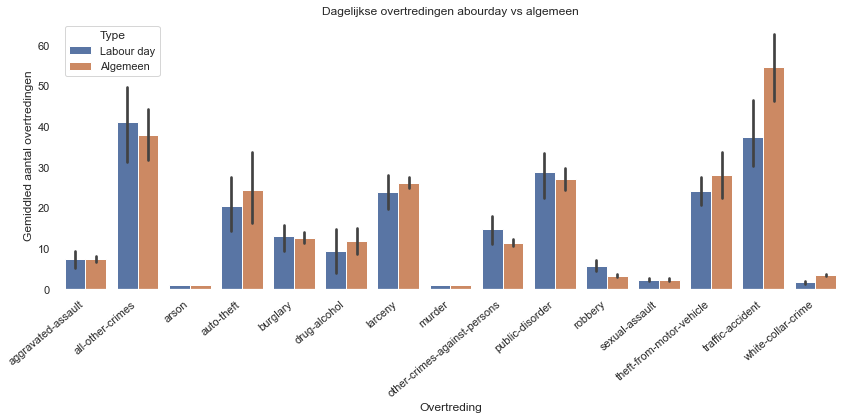

In [45]:
plt.figure(figsize=(12,6))
graph = sns.barplot(
    data=j2_joined,
    x="Overtreding",
    y="Gemiddled aantal overtredingen",
    hue="Type",
)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha="right")

plt.title("Dagelijkse overtredingen abourday vs algemeen")
plt.tight_layout()
plt.show()

# Job story 3: Hit and run

## Job story 3.1: Hoe vaak is er een hit en run gedaan?

### Business understanding
De politiechef heeft ons gevraagd om te kijken of er een grote stijging is met de aantal hit & run incidenten.

### Data preperation
Hiervoor gebruiken wij de crime_df dataset.

### Select data
Om te kunnen modelleren, hebben we een aantal gegevens nodig. Namelijk:

Alle incidenten met de misdaad type traffic-accident-hit-and-run

In [46]:
# Om onafhankelijk aanpassingen te maken zijn nieuwe variabelen handig, vandaar een copy en een tag j1 (job story 1) aan het begin van het variabel
j1_crime_df = crime_df.copy()

In [52]:
# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_allhitandruns = j1_crime_df[j1_crime_df["OFFENSE_TYPE_ID"] == "traffic-accident-hit-and-run"]

j1_grouped = j1_allhitandruns.groupby("REPORTED_DATE_NORMALIZED", as_index=False).size()
j1_grouped.columns = ["Datum", "Aantal incidenten"]

j1_grouped

,Datum,Aantal incidenten
0,2017-01-02,9
1,2017-01-03,15
2,2017-01-04,14
3,2017-01-05,16
4,2017-01-06,25
...,...,...
1879,2022-02-24,24
1880,2022-02-25,19
1881,2022-02-26,14
1882,2022-02-27,20


### Modeling

Om de geprepareerde data in kaart te brengen is een barplot gebruikt om de aantallen te visualiseren.

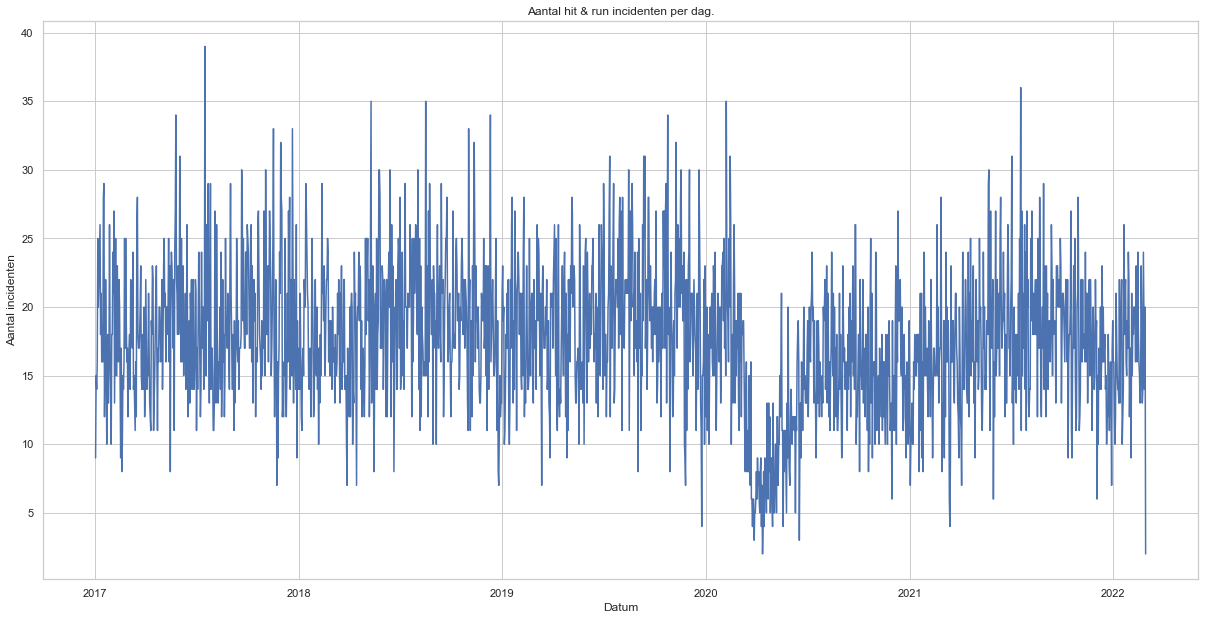

In [53]:
a4_dims = (20.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=j1_grouped, x="Datum", y="Aantal incidenten", palette="rocket").set(title='Aantal hit & run incidenten per dag.')
plt.show()

Gezien aan de plot hierboven, zie je dat er tussen 2020 en 2021 erg weinig hit & runs zijn geweest vergeleken met de rest. Laten we daar dieper op in gaan

In [54]:
mask = (j1_grouped['Datum'] > '2020-1-1') & (j1_grouped['Datum'] <= '2021-1-1')

j1_zoomed = j1_grouped.loc[mask]

j1_zoomed

,Datum,Aantal incidenten
1095,2020-01-02,12
1096,2020-01-03,20
1097,2020-01-04,11
1098,2020-01-05,15
1099,2020-01-06,18
...,...,...
1456,2020-12-28,13
1457,2020-12-29,10
1458,2020-12-30,11
1459,2020-12-31,19


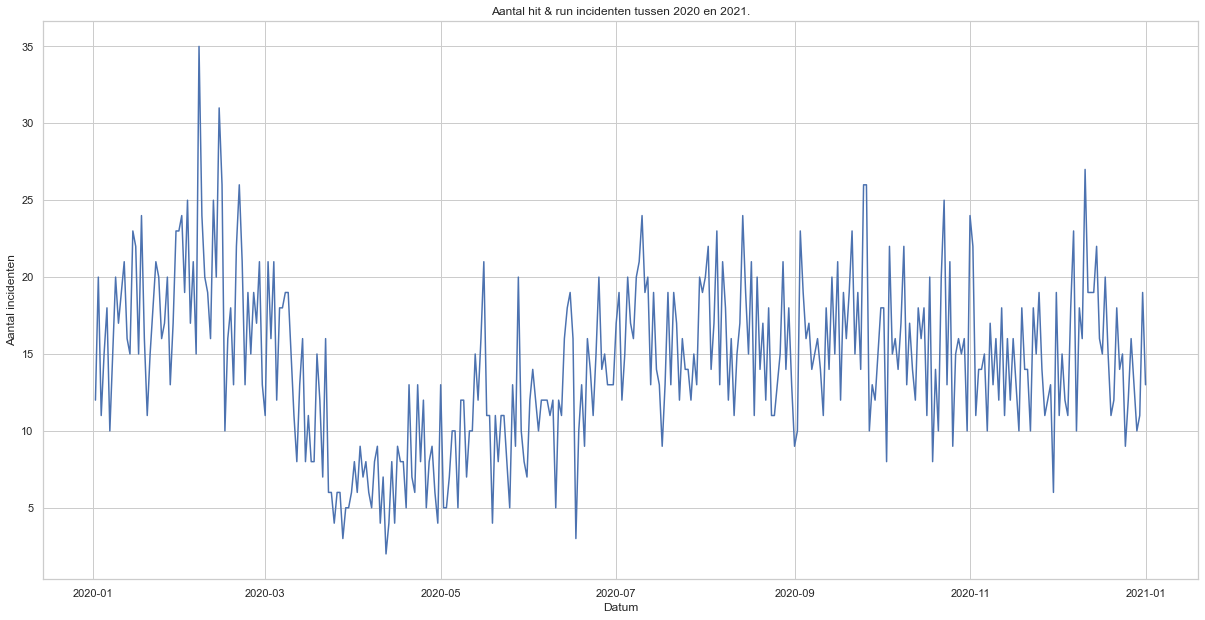

In [55]:
a4_dims = (20.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=j1_zoomed, x="Datum", y="Aantal incidenten", palette="rocket").set(title='Aantal hit & run incidenten tussen 2020 en 2021.')
plt.show()

Gezien naar de plot hierboven is er inderdaad tussen Maart en Juli een stuk minder is. Laten we kijken of dit ook zo is met normale verkeers incidenten en auto diefstal.

In [56]:
# Tel alle incidenten op per datum van de Memorial days. Daarna voeg je de jaar toe als een kolom samen met de type.
j1_categorized = j1_crime_df[j1_crime_df["OFFENSE_TYPE_ID"].isin(["traffic-accident", "traffic-accident-hit-and-run", "theft-items-from-vehicle", "theft-parts-from-vehicle"])]
j1_categorized = j1_categorized.groupby(["OFFENSE_TYPE_ID", "REPORTED_DATE_NORMALIZED"], as_index=False).size()

mask = (j1_categorized['REPORTED_DATE_NORMALIZED'] > '2020-1-1') & (j1_categorized['REPORTED_DATE_NORMALIZED'] <= '2021-1-1')

j1_cat_zoomed = j1_categorized.loc[mask]

j1_cat_zoomed.columns = ["Categorie", "Datum", "Aantal incidenten"]
j1_cat_zoomed

,Categorie,Datum,Aantal incidenten
1095,theft-items-from-vehicle,2020-01-02,17
1096,theft-items-from-vehicle,2020-01-03,17
1097,theft-items-from-vehicle,2020-01-04,12
1098,theft-items-from-vehicle,2020-01-05,15
1099,theft-items-from-vehicle,2020-01-06,14
...,...,...,...
7099,traffic-accident-hit-and-run,2020-12-28,13
7100,traffic-accident-hit-and-run,2020-12-29,10
7101,traffic-accident-hit-and-run,2020-12-30,11
7102,traffic-accident-hit-and-run,2020-12-31,19


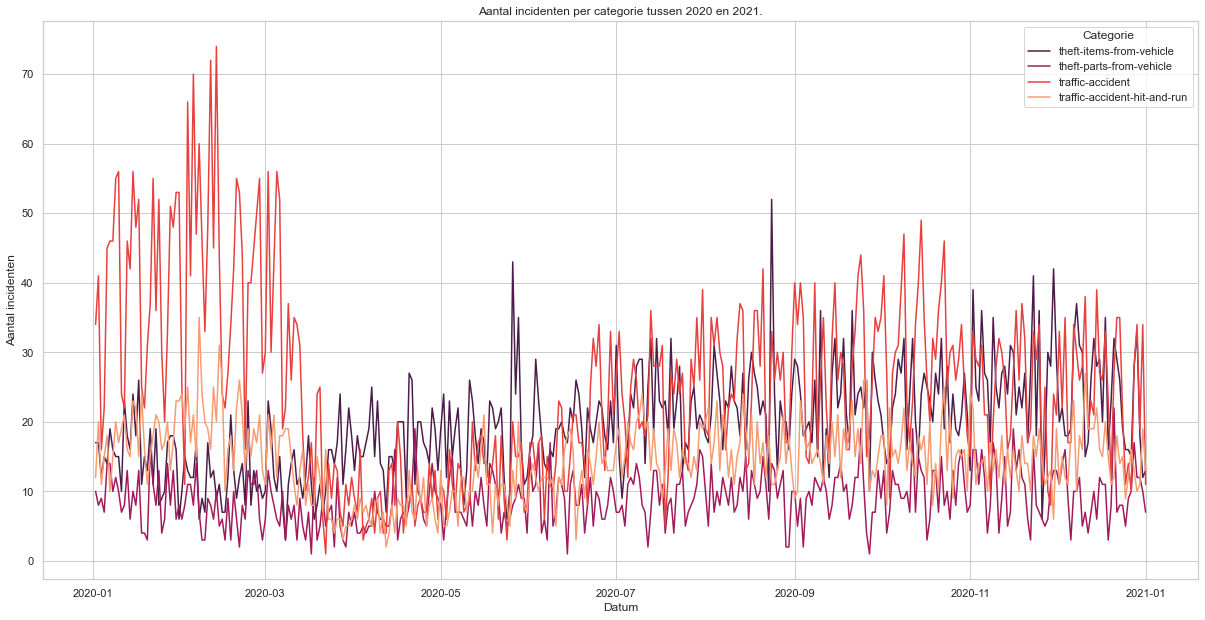

In [57]:
a4_dims = (20.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=j1_cat_zoomed, x="Datum", y="Aantal incidenten", hue="Categorie", palette="rocket").set(title='Aantal incidenten per categorie tussen 2020 en 2021.')
plt.show()

Bovenstaand zien wij een soortgelijke verlaging als bij de hit & run bij alle categoriën.

Na wat zoeken kwam ik er achter dat op 19 maart 2020 1 van de grootste sneeuwstormen was in Denver in 4 jaar. Op dit moment begon ook de Corona resticties te gelden die Denver had opgesteld.

Door deze 2 factoren zijn er minder mensen buiten geweest met de auto. Daarbij zijn ook de auto diefstallen minder geworden, voornamelijk het stelen van auto onderdelen.

# Job story 4: COVID verschillen

### Business understanding
Als politiechef wil ik de impact en het herstel van de coronapandemie in kaart hebben, zodat ik kan anticiperen op mogelijke veranderingen

#### Business objectives
De politiechef wilt de impact van COVID en het herstel daarvan in kaart hebben.
- Een grafiek met gegevens van type criminaliteit voor covid en na covid

### Data understanding
Zie globale data understanding

### Data preparation

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

j6_crime_df = crime_df.copy()

# Adds a normalized reported date, the reported date gets converted to a date only, to be able to merge the mondays
j6_crime_df["REPORTED_DATE_NORMALIZED"] = pd.to_datetime(crime_df["REPORTED_DATE"]).dt.normalize()
j6_crime_df["YEAR"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.isocalendar().year
j6_crime_df["MONTH"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.month
j6_crime_df["WEEK"] = crime_df["REPORTED_DATE_NORMALIZED"].dt.isocalendar().week
j6_crime_df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DATE_NORMALIZED,YEAR,MONTH,WEEK
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 12:00:00,2022-01-04 20:36:00,128 S CANOSA CT,...,39.714268,4.0,411.0,valverde,1,0,2022-01-04,2022,1,1
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 06:45:00,NaT,2022-01-03 11:01:00,650 15TH ST,...,39.743649,6.0,611.0,cbd,1,0,2022-01-03,2022,1,1
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 01:00:00,NaT,2022-01-03 06:11:00,919 E COLFAX AVE,...,39.740130,6.0,621.0,north-capitol-hill,1,0,2022-01-03,2022,1,1
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,NaT,2022-01-03 21:12:00,2345 W ALAMEDA AVE,...,39.711518,4.0,411.0,valverde,1,0,2022-01-03,2022,1,1
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,2022-01-03 17:06:00,NaT,2022-01-03 20:31:00,7800 E SMITH RD,...,39.769688,5.0,512.0,central-park,1,0,2022-01-03,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470273,202297778,202297778260700,2607,0,fraud-by-telephone,white-collar-crime,2022-02-25 08:00:00,2022-02-25 17:00:00,2022-02-26 09:22:00,4850 S AMMONS ST,...,39.629311,4.0,423.0,marston,1,0,2022-02-26,2022,2,8
470274,202297851,202297851260700,2607,0,fraud-by-telephone,white-collar-crime,2022-01-27 09:00:00,NaT,2022-02-26 10:21:00,14151 E RANDOLPH PL,...,39.797813,5.0,521.0,montbello,1,0,2022-02-26,2022,2,8
470275,202296894,202296894260900,2609,0,fraud-by-use-of-computer,white-collar-crime,2022-02-24 12:00:00,NaT,2022-02-25 23:30:00,301 N JERSEY ST,...,39.721561,3.0,321.0,hilltop,1,0,2022-02-25,2022,2,8
470276,2022100071,2022100071269903,2699,3,theft-of-services,larceny,2022-02-27 12:00:00,NaT,2022-02-27 18:22:00,1605 N FEDERAL BLVD,...,39.742973,1.0,121.0,west-colfax,1,0,2022-02-27,2022,2,8


### Modelling

##### Heatmap misdaden 2017-2021
Hier onder is een heatmap te zien met alle misdaden per maand van het jaar 2017 tot 2021

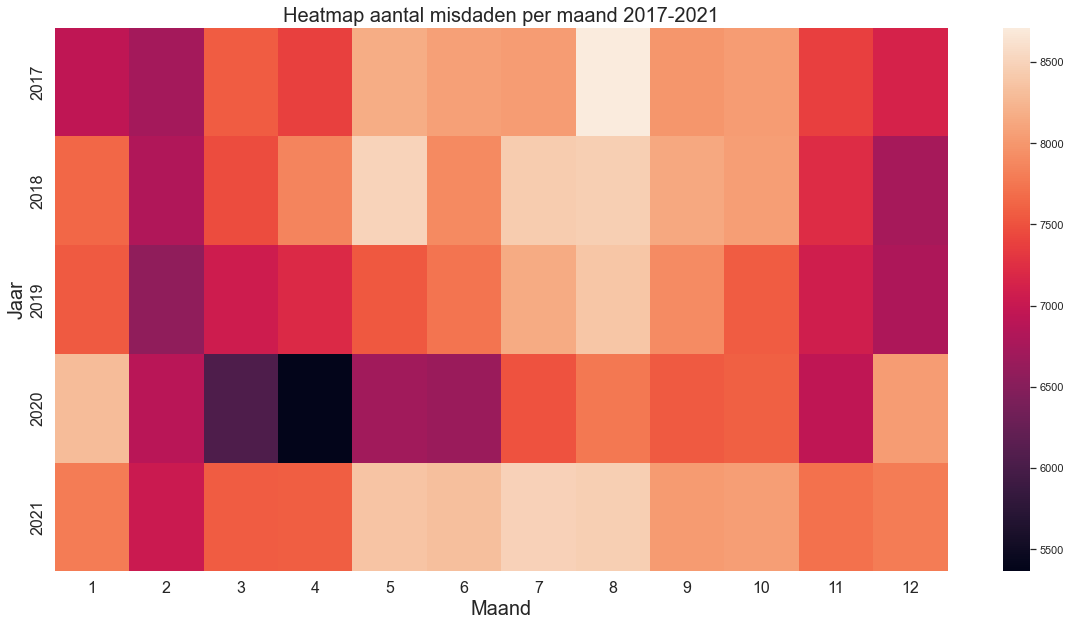

In [48]:
df_heat = j6_crime_df.copy()
df_total_peryear = df_heat.drop(df_heat[df_heat["YEAR"] == 2022].index)

plt.figure(figsize=(20, 10))

pivot = df_total_peryear.pivot_table(
    index="YEAR",
    columns="MONTH",
    values="REPORTED_DATE_NORMALIZED",
    aggfunc="size"
).fillna(0)
sns.heatmap(pivot)
plt.title("Heatmap aantal misdaden per maand 2017-2021", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Maand", fontsize=20)
plt.ylabel("Jaar", fontsize=20)
plt.show()

##### Verandering in misdaad 2017-2021
Hieronder worden de wisselingen in criminaliteit van 2017 tot 2021 in kaart gebracht aan de hand van een pointplot.

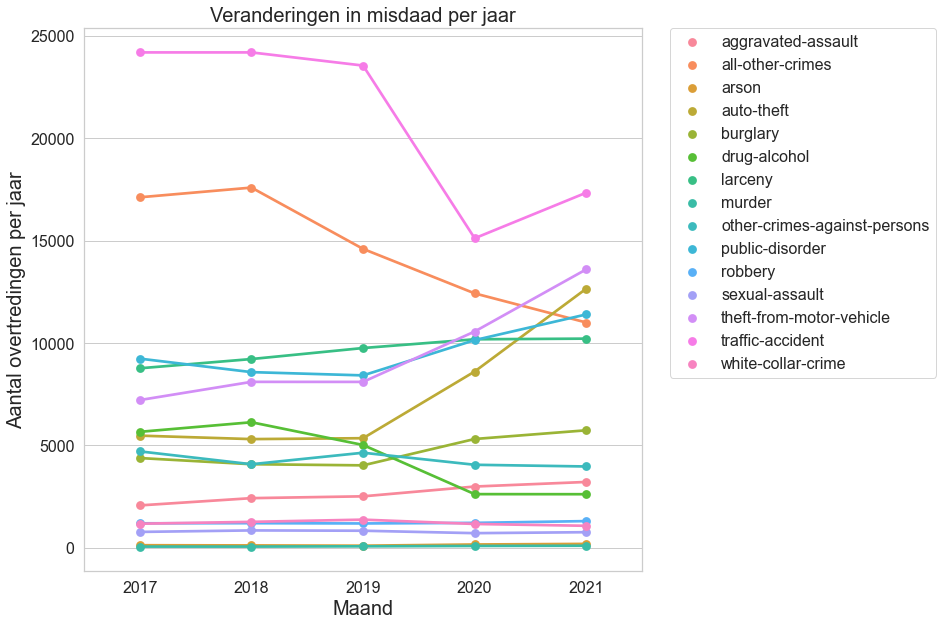

In [49]:
grouped = j6_crime_df.groupby(["OFFENSE_CATEGORY_ID", "YEAR"], as_index=False).size()
grouped_till22 = grouped.drop(grouped[grouped["YEAR"] == 2022].index)
grouped_till22.columns = ["Overtreding", "Jaar", "Gemiddeld aantal overtredingen"]
grouped_till22

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.pointplot(data=grouped_till22, x="Jaar", y="Gemiddeld aantal overtredingen", hue="Overtreding", grid=True )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=16)
plt.title("Veranderingen in misdaad per jaar", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Maand", fontsize=20)
plt.ylabel("Aantal overtredingen per jaar", fontsize=20)
plt.show()

##### Verandering in misdaad 2019 ten opzichte van 2021
Hieronder worden de veranderingen in misdaad van 2019 ten opzichte van 2021 in kaart gebracht.

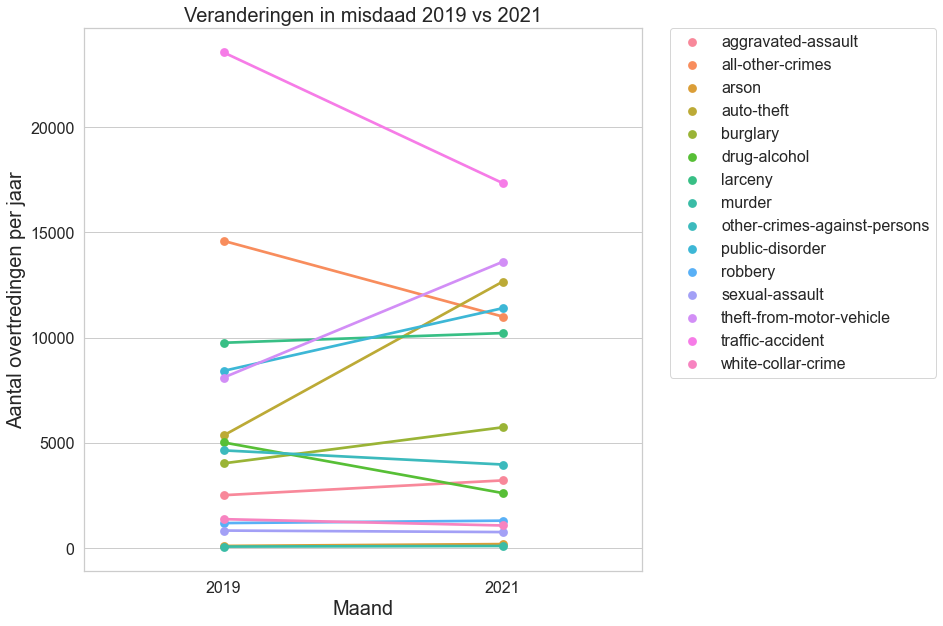

In [50]:
df_2019 = grouped_till22.loc[grouped_till22["Jaar"] == 2019]
df_2021 = grouped_till22.loc[grouped_till22["Jaar"] == 2021]
df_2019_2021 = df_2019.append(df_2021)

plt.figure(figsize=(10,10))
ax = sns.pointplot(data=df_2019_2021, x="Jaar", y="Gemiddeld aantal overtredingen", hue="Overtreding")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=16)
plt.title("Veranderingen in misdaad 2019 vs 2021", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Maand", fontsize=20)
plt.ylabel("Aantal overtredingen per jaar", fontsize=20)
plt.show()

# Job story 5:

# Job story 6: